In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
#merging on mouse ID
merge_table = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID")

# Making a smaller dataframe with our 4 drug trials
our_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
merge_table_short = merge_table.loc[merge_table["Drug"].isin(our_drugs),:]

# Display the data table for preview
merge_table_short.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0           45.000000                 0  Capomulin
1     b128          5           45.651331                 0  Capomulin
2     b128         10           43.270852                 0  Capomulin
3     b128         15           43.784893                 0  Capomulin
4     b128         20           42.731552                 0  Capomulin

## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = merge_table_short.groupby(by=["Drug", "Timepoint"]).mean().reset_index()
# Convert to DataFrame

# Preview DataFrame
#getting rid of "Metastatic Sites" column
mean_tumor_vol.drop(columns=["Metastatic Sites"], inplace = True)
mean_tumor_vol.head()

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0           45.000000
1  Capomulin          5           44.266086
2  Capomulin         10           43.084291
3  Capomulin         15           42.064317
4  Capomulin         20           40.716325

Drug  Timepoint  Tumor Volume (mm3)
0   Capomulin          0           45.000000
1   Capomulin          5           44.266086
2   Capomulin         10           43.084291
3   Capomulin         15           42.064317
4   Capomulin         20           40.716325
5   Capomulin         25           39.939528
6   Capomulin         30           38.769339
7   Capomulin         35           37.816839
8   Capomulin         40           36.958001
9   Capomulin         45           36.236114
10   Ceftamin          0           45.000000
11   Ceftamin          5           46.503051
12   Ceftamin         10           48.285125
13   Ceftamin         15           50.094055
14   Ceftamin         20           52.157049
15   Ceftamin         25           54.287674
16   Ceftamin         30           56.769517
17   Ceftamin         35           58.827548
18   Ceftamin         40           61.467895
19   Ceftamin         45           64.132421
20  Infubinol          0           45.000000
21  Infubinol          5           47.062001
22  Infubinol         10           49.403909
23  Infubinol         15           51.296397
24  Infubinol         20           53.197691
25  Infubinol         25           55.715252
26  Infubinol         30           58.299397
27  Infubinol         35           60.742461
28  Infubinol         40           63.162824
29  Infubinol         45           65.755562
..        ...        ...                 ...
70   Ramicane          0           45.000000
71   Ramicane          5           43.944859
72   Ramicane         10           42.531957
73   Ramicane         15           41.495061
74   Ramicane         20           40.238325
75   Ramicane         25           38.974300
76   Ramicane         30           38.703137
77   Ramicane         35           37.451996
78   Ramicane         40           36.574081
79   Ramicane         45           34.955595
80   Stelasyn          0           45.000000
81   Stelasyn          5           47.527452
82   Stelasyn         10           49.463844
83   Stelasyn         15           51.529409
84   Stelasyn         20           54.067395
85   Stelasyn         25           56.166123
86   Stelasyn         30           59.826738
87   Stelasyn         35           62.440699
88   Stelasyn         40           65.356386
89   Stelasyn         45           68.438310
90  Zoniferol          0           45.000000
91  Zoniferol          5           46.851818
92  Zoniferol         10           48.689881
93  Zoniferol         15           50.779059
94  Zoniferol         20           53.170334
95  Zoniferol         25           55.432935
96  Zoniferol         30           57.713531
97  Zoniferol         35           60.089372
98  Zoniferol         40           62.916692
99  Zoniferol         45           65.960888

[100 rows x 3 columns]

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = merge_table_short.groupby(by=["Drug", "Timepoint"]).sem().reset_index()
# Convert to DataFrame

# Preview DataFrame
#getting rid of "Metastatic Sites" column
sem_tumor_vol.drop(columns=["Metastatic Sites", "Mouse ID"], inplace = True)
sem_tumor_vol.head()

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean_tumor_vol = mean_tumor_vol.pivot(index="Timepoint", columns='Drug', values="Tumor Volume (mm3)")
# Preview that Reformatting worked
pivot_mean_tumor_vol

Drug       Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                            
0          45.000000  45.000000  45.000000  45.000000
5          44.266086  47.062001  47.389175  47.125589
10         43.084291  49.403909  49.582269  49.423329
15         42.064317  51.296397  52.399974  51.359742
20         40.716325  53.197691  54.920935  54.364417
25         39.939528  55.715252  57.678982  57.482574
30         38.769339  58.299397  60.994507  59.809063
35         37.816839  60.742461  63.371686  62.420615
40         36.958001  63.162824  66.068580  65.052675
45         36.236114  65.755562  70.662958  68.084082

In [6]:
# Minor Data Munging to Re-Format the Data Frames
pivot_sem_tumor_vol = sem_tumor_vol.pivot(index="Timepoint", columns='Drug', values="Tumor Volume (mm3)")
# Preview that Reformatting worked
pivot_sem_tumor_vol

Drug       Capomulin  Infubinol  Ketapril   Placebo
Timepoint                                          
0           0.000000   0.000000  0.000000  0.000000
5           0.448593   0.235102  0.264819  0.218091
10          0.702684   0.282346  0.357421  0.402064
15          0.838617   0.357705  0.580268  0.614461
20          0.909731   0.476210  0.726484  0.839609
25          0.881642   0.550315  0.755413  1.034872
30          0.934460   0.631061  0.934121  1.218231
35          1.052241   0.984155  1.127867  1.287481
40          1.223608   1.055220  1.158449  1.370634
45          1.223977   1.144427  1.453186  1.351726

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

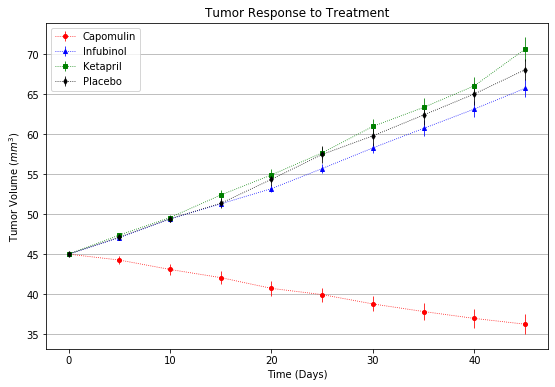

In [7]:
# Generate the Plot (with Error Bars)
#marker style, line style, and color as list for 4 data series
markers = ["o:r", "^:b", "s:g", "d:k"]

fig, ax = plt.subplots(figsize=(9,6))

#Plotting 4 series with for-loop ax.errorbar(x_axis, means, standard_errors)
for i in range(len(our_drugs)):
    ax.errorbar(pivot_mean_tumor_vol.index, pivot_mean_tumor_vol[our_drugs[i]], \
                pivot_sem_tumor_vol[our_drugs[i]], fmt=markers[i], lw=0.8, ms=4)
    
# Labels
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume ($mm^3$)")
ax.set_title("Tumor Response to Treatment")
ax.yaxis.grid()
plt.legend(our_drugs)
#Save

plt.savefig("images/Tumor_Response_to_Treatment.png")

# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_met_sit = merge_table_short.groupby(by=["Drug", "Timepoint"]).mean().reset_index()
# Convert to DataFrame

# Preview DataFrame
#getting rid of "Tumor Volume (mm3)" column
mean_met_sit.drop(columns=["Tumor Volume (mm3)"], inplace = True)
mean_met_sit.head()

Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.160000
2  Capomulin         10          0.320000
3  Capomulin         15          0.375000
4  Capomulin         20          0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_sit = merge_table_short.groupby(by=["Drug", "Timepoint"]).sem().reset_index()
# Convert to DataFrame

# Preview DataFrame
#getting rid of "Metastatic Sites" column
sem_met_sit.drop(columns=["Tumor Volume (mm3)", "Mouse ID"], inplace = True)
sem_met_sit.head()

Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.074833
2  Capomulin         10          0.125433
3  Capomulin         15          0.132048
4  Capomulin         20          0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean_met_sit = mean_met_sit.pivot(index="Timepoint", columns='Drug', values="Metastatic Sites")
# Preview that Reformatting worked
pivot_mean_met_sit

Drug       Capomulin  Infubinol  Ketapril   Placebo
Timepoint                                          
0           0.000000   0.000000  0.000000  0.000000
5           0.160000   0.280000  0.304348  0.375000
10          0.320000   0.666667  0.590909  0.833333
15          0.375000   0.904762  0.842105  1.250000
20          0.652174   1.050000  1.210526  1.526316
25          0.818182   1.277778  1.631579  1.941176
30          1.090909   1.588235  2.055556  2.266667
35          1.181818   1.666667  2.294118  2.642857
40          1.380952   2.100000  2.733333  3.166667
45          1.476190   2.111111  3.363636  3.272727

In [11]:
# Minor Data Munging to Re-Format the Data Frames
pivot_sem_met_sit = sem_met_sit.pivot(index="Timepoint", columns='Drug', values="Metastatic Sites")
# Preview that Reformatting worked
pivot_sem_met_sit

Drug       Capomulin  Infubinol  Ketapril   Placebo
Timepoint                                          
0           0.000000   0.000000  0.000000  0.000000
5           0.074833   0.091652  0.098100  0.100947
10          0.125433   0.159364  0.142018  0.115261
15          0.132048   0.194015  0.191381  0.190221
20          0.161621   0.234801  0.236680  0.234064
25          0.181818   0.265753  0.288275  0.263888
30          0.172944   0.227823  0.347467  0.300264
35          0.169496   0.224733  0.361418  0.341412
40          0.175610   0.314466  0.315725  0.297294
45          0.202591   0.309320  0.278722  0.304240

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

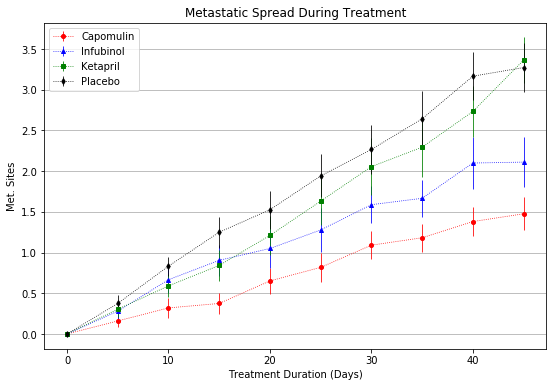

In [12]:
# Generate the Plot (with Error Bars)
#marker style, line style, and color as list for 4 data series
markers = ["o:r", "^:b", "s:g", "d:k"]

fig, ax = plt.subplots(figsize=(9,6))

#Plotting 4 series with for-loop ax.errorbar(x_axis, means, standard_errors)
for i in range(len(our_drugs)):
    ax.errorbar(pivot_mean_met_sit.index, pivot_mean_met_sit[our_drugs[i]], \
                pivot_sem_met_sit[our_drugs[i]], fmt=markers[i], lw=0.8, ms=4)
    
# Labels
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title("Metastatic Spread During Treatment")
ax.yaxis.grid()
plt.legend(our_drugs)

#Save
plt.savefig("images/Metastatic_Spread_During_Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (We can pass any metric)
mouse_counts = merge_table_short.groupby(by=["Drug", "Timepoint"]).count().reset_index()

#getting rid of "Tumor Volume (mm3)"  and "Metastatic Sites" columns
mouse_counts.drop(columns=["Tumor Volume (mm3)", "Metastatic Sites"], inplace = True)

#Renaming "Mouse ID" to "Mouse Count"
mouse_counts.rename(columns={"Mouse ID" : "Mouse Count"}, inplace = True)

# Preview DataFrame
mouse_counts.head()

Drug  Timepoint  Mouse Count
0  Capomulin          0           25
1  Capomulin          5           25
2  Capomulin         10           25
3  Capomulin         15           24
4  Capomulin         20           23

Drug  Timepoint  Mouse Count
0  Capomulin          0           25
1  Capomulin          5           25
2  Capomulin         10           25
3  Capomulin         15           24
4  Capomulin         20           23

In [15]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mouse_counts = mouse_counts.pivot(index="Timepoint", columns='Drug', values="Mouse Count")

# Preview that Reformatting worked
pivot_mouse_counts

Drug       Capomulin  Infubinol  Ketapril  Placebo
Timepoint                                         
0                 25         25        25       25
5                 25         25        23       24
10                25         21        22       24
15                24         21        19       20
20                23         20        19       19
25                22         18        19       17
30                22         17        18       15
35                22         12        17       14
40                21         10        15       12
45                21          9        11       11

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17

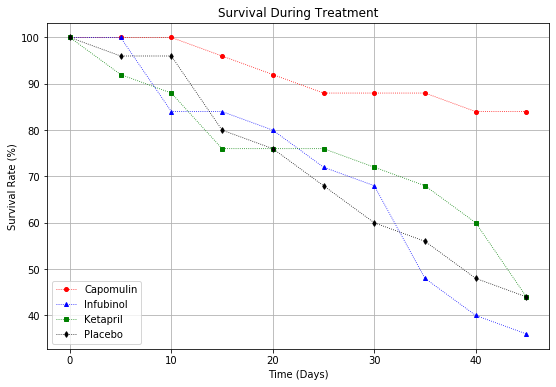

In [16]:
# Generate the Plot (Accounting for percentages)

#marker style, line style, and color as list for 4 data series
markers = ["o:r", "^:b", "s:g", "d:k"]

fig, ax = plt.subplots(figsize=(9,6))

#Plotting 4 series with for-loop ax.errorbar(x_axis, counts)
#defaults to no error bars drawn
for i in range(len(our_drugs)):
    ax.errorbar(pivot_mouse_counts.index, pivot_mouse_counts[our_drugs[i]] * \
                100 / pivot_mouse_counts[our_drugs[1]].max(), \
               fmt=markers[i], lw=0.8, ms=4)
    
# Labels
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival During Treatment")
ax.grid()
plt.legend(our_drugs, loc=3)

#Save
plt.savefig("images/Survival_During_Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
percent_change = (pivot_mean_tumor_vol.iloc[-1, :] - pivot_mean_tumor_vol.iloc[0, :]) * \
    100 / pivot_mean_tumor_vol.iloc[0, :]
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

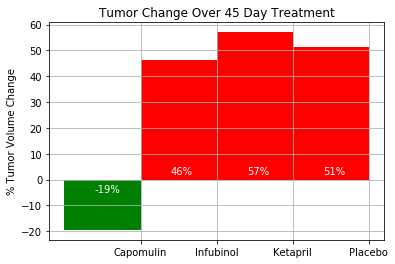

In [20]:
x_axis = np.arange(len(our_drugs))

#Is percent change negative or positive
#color bars accordingly
color_list = []
for num in percent_change:
    if num >= 0:
        color_list.append('r')
    else:
        color_list.append('g')
        
#bar plot
plt.bar(x_axis, percent_change, color=color_list, align="center", width=1)
tick_locations = [value + 0.5 for value in x_axis]
plt.xticks(tick_locations, our_drugs)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid()

#setting coordinants for percent annotation over the bars
for i in range(len(percent_change)):
    if percent_change[i] > 0:
        y = 2
    else:
        y = -5 
    plt.annotate("{:.0%}".format(percent_change[i]/100), (x_axis[i]-0.1,y), color="white")
    
#Save
plt.savefig("images/Tumor_Change_Over_45_Day_Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)